In [1]:
import cv2

img1_color = cv2.imread('dataset/img1.jpg', cv2.IMREAD_ANYCOLOR)
img2_color = cv2.imread('dataset/img2.jpg', cv2.IMREAD_ANYCOLOR)
img3_color = cv2.imread('dataset/img3.jpg', cv2.IMREAD_ANYCOLOR)
img4_color = cv2.imread('dataset/img4.jpg', cv2.IMREAD_ANYCOLOR)

img1 = cv2.imread('dataset/img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('dataset/img2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('dataset/img3.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('dataset/img4.jpg', cv2.IMREAD_GRAYSCALE)

Sobel

In [4]:
img1_sobel_x = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize = 3)
img1_sobel_x = cv2.convertScaleAbs(img1_sobel_x)
img1_sobel_y = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize = 3)
img1_sobel_y = cv2.convertScaleAbs(img1_sobel_y)
img1_sobel = cv2.addWeighted(img1_sobel_x, 1, img1_sobel_y, 1, 0);
print(img1_sobel)
cv2.imshow("img1_original", img1)
cv2.imshow("img1_edge", img1_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scharr

In [ ]:
img2_scharr_x = cv2.Scharr(img2, cv2.CV_64F, 1, 0)
img2_scharr_x = cv2.convertScaleAbs(img2_scharr_x)
img2_scharr_y = cv2.Scharr(img2, cv2.CV_64F, 0, 1)
img2_scharr_y = cv2.convertScaleAbs(img2_scharr_y)
img2_scharr = cv2.addWeighted(img2_scharr_x, 1, img2_scharr_y, 1, 0);
cv2.imshow("img1_original", img2)
cv2.imshow("img1_edge", img2_scharr)
cv2.waitKey(0)
cv2.destroyAllWindows()

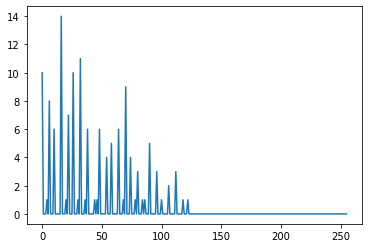

In [ ]:
import matplotlib.pyplot as plt
hist = cv2.calcHist(img2_scharr, [0], None, [256], [0,256])
plt.plot(hist)

Canny Edge

In [ ]:
img = img3
img_canny = cv2.Canny(img, 25, 50)
cv2.imshow("img_original", img)
cv2.imshow("img_edge", img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

Blob

In [67]:
import numpy as np
img = img1
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0
params.thresholdStep = 0.01
params.maxThreshold = 1
params.minArea = 0.01;
params.maxArea = 100;
params.filterByArea = True;
params.filterByColor = True
params.blobColor = 0

detector = cv2.SimpleBlobDetector_create(params)
kp = detector.detect(img)

img_edge = cv2.drawKeypoints(img, kp, np.zeros((1,1)), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow("img_original", img)
cv2.imshow("img_edge", img_edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [70]:
img = img1
ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(len(contours))
for cnt in contours:
    cv2.drawContours(img1_color, [cnt], 0, (0, 0, 255), 3)  # blue

cv2.imshow("result", img1_color)

cv2.waitKey(0)

1


-1

In [ ]:
cv2.filter2D()